<a href="https://colab.research.google.com/github/kurtlee1984/Machine_Learning/blob/main/cluster_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
iris_data = load_iris()
df = pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
df["target"] = iris_data["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop(["target"], axis=1)
y = df["target"] 
x = np.array(x)
y = np.array(y)
x_train, x_test, y_treain, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)

(135, 4)
(15, 4)


In [5]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
clu.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
clu.labels_

array([0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0,
       1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0,
       1, 2, 1], dtype=int32)

In [7]:
print("預測的結果:", list(clu.predict(x_test)))
print("正確的結果:", list(y_test))

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, clu.predict(x_test))
print("正確率:", score)

預測的結果: [0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1]
正確的結果: [0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1]
正確率: 0.9333333333333333


In [8]:
from sklearn.metrics import silhouette_score
x = df.drop(["target"], axis=1)
x_plot = []
y_plot = []
# x
for k in range(2, 6):
  clu = KMeans(n_clusters=k)
  clu.fit(x)
  s = silhouette_score(x, clu.labels_)
  x_plot.append(k)
  y_plot.append(s)
print("K值", x_plot)
print("Score", y_plot)

K值 [2, 3, 4, 5]
Score [0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.4887488870931048]


Text(0, 0.5, 'Score')

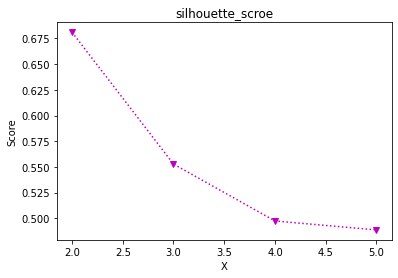

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_plot, y_plot, "mv:")
plt.title("silhouette_scroe")
plt.xlabel("X")
plt.ylabel("Score")
# plt.show

In [27]:
from sklearn.metrics import silhouette_score
for k in range(2, 10):
  test = KMeans(n_clusters=k)
  test.fit(iris_data["data"])
  score = silhouette_score(iris_data["data"], test.labels_)
  print(k, ":", score)

2 : 0.681046169211746
3 : 0.5528190123564091
4 : 0.49745518901737446
5 : 0.4887488870931048
6 : 0.3678464984712235
7 : 0.3588294450965675
8 : 0.3520039484603334
9 : 0.3439103447481878


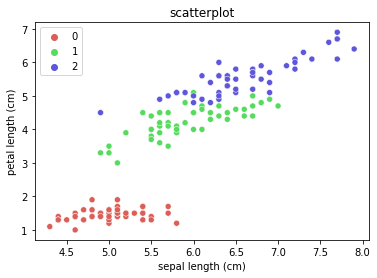

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("scatterplot")
plt.xlabel(iris_data["feature_names"][0])
plt.ylabel(iris_data["feature_names"][2])
sl = iris_data["data"][:, 0]
pl = iris_data["data"][:, 2]
sns.scatterplot(x=sl, y=pl, hue=iris_data["target"], palette=sns.color_palette("hls", 3))